# Домашняя работа №2. Выполнил Косолапов Андрей Павлович

In [142]:
!pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Загрузка данных и первичный осмотр

In [143]:
data = pd.read_csv('S02-hw-dataset.csv')

In [144]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [146]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## Пропуски, дубликаты и базовый контроль качества

In [147]:
data.isna().mean() # Считает долю пустых значений по каждому столбцу

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [148]:
data.duplicated().mean() # Доля дублирующихся строчек

np.float64(0.024390243902439025)

In [149]:
# Нахождение подозрительных случаев
print('Строки с возрастом < 0 или > 100:')
data[(data['age'] <= 0) | (data['age'] > 100)]

Строки с возрастом < 0 или > 100:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [150]:
print('Строки с revenue <= 0 при purchases > 0:')
data[(data['revenue'] <= 0) & (data['purchases'] > 0)]

Строки с revenue <= 0 при purchases > 0:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [151]:
print('Строки с отрицательными значениями в revenue и purchases')
data[(data['purchases'] < 0) | (data['revenue'] < 0)]

Строки с отрицательными значениями в revenue и purchases


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [152]:
print('Строки с длиной country != 2:')
data[data['country'].str.len() != 2]

Строки с длиной country != 2:


,user_id,age,country,purchases,revenue


### В данных были обнаружены пропуски в столбце age (~4%), 2% дублированных строк и строки с недопустимыми значениями (age > 100, revenue = 0 при purchases > 0, отрицательное количество purchases)

## Базовый EDA: группировки, агрегаты и частоты

Частоты по столбцу age:

In [153]:
data['age'].value_counts()

age
24.0     5
52.0     2
31.0     2
28.0     2
39.0     2
35.0     2
47.0     2
32.0     2
25.0     1
55.0     1
43.0     1
45.0     1
26.0     1
23.0     1
51.0     1
18.0     1
54.0     1
5.0      1
21.0     1
42.0     1
33.0     1
22.0     1
57.0     1
36.0     1
20.0     1
46.0     1
120.0    1
34.0     1
Name: count, dtype: int64

Частоты по столбцу country:

In [154]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Средний возраст по странам:

In [155]:
age_group = data.groupby('country')
age_group['age'].mean()

country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64

Создание возрастных групп через "коридоры"

In [156]:
age_cuted = pd.cut(data['age'],
                   [0, 13, 19, 65, 100],
                   labels=['Ребёнок', 'Подросток', 'Взрослый', 'Пожилой'], 
                   include_lowest=True,
)
age_cuted.value_counts()

age
Взрослый     36
Ребёнок       1
Подросток     1
Пожилой       0
Name: count, dtype: int64

Создание категорий по выручке

In [157]:
revenue_cuted = pd.cut(data['revenue'],
                       3,
                       labels=['Низкая выручка', 'Средняя выручка', 'Большая выручка'],
                       include_lowest=True
)
revenue_cuted.value_counts()

revenue
Низкая выручка     25
Средняя выручка    12
Большая выручка     4
Name: count, dtype: int64

Новый DataFrame с новыми категориями

In [158]:
new_data = data.copy()
new_data['age'] = age_cuted
new_data['revenue'] = revenue_cuted
new_data.head()

,user_id,age,country,purchases,revenue
0,1,Взрослый,FR,7,Низкая выручка
1,2,Взрослый,RU,5,Средняя выручка
2,3,Взрослый,FR,7,Низкая выручка
3,4,Взрослый,RU,6,Низкая выручка
4,5,NaN,DE,6,Средняя выручка


Дополнительно, сгруппируем данные по странам и узнаем, у каких граждан больше всего выручки

In [159]:
country_group = data.groupby('country')
country_group['revenue'].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

### По выявленным данным, можно сказать, что:
- Категория взрослых (возрастом от 19 до 65 лет) доминирует над остальными
- Максимальный средний возраст наблюдается у граждан Франции, тогда как минимальный - у граждан Китая
- Больше всего выручки у граждан Германии, меньше всего - у граждан США

## Визуализация данных в Matplotlib

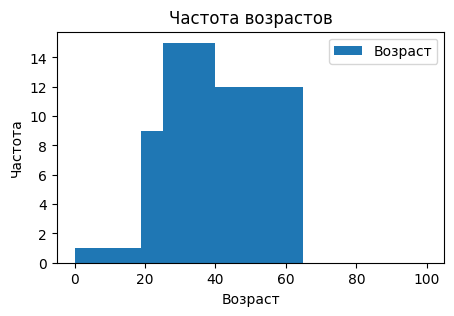

In [160]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(data['age'].to_numpy(),
        bins=np.array([0, 13, 19, 25, 40, 65, 100]),
        label=('Возраст')
)
ax.legend()
ax.set_title('Частота возрастов')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.show()

По графику частоты возрастов можно понять, что в данных большинство людей представлены возрастом от 20 до 65 лет

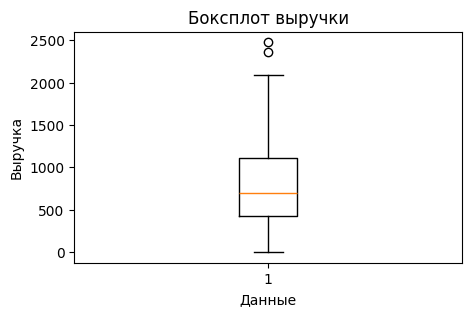

In [161]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.boxplot(data['revenue'].to_numpy())
ax.set_title('Боксплот выручки')
ax.set_xlabel('Данные')
ax.set_ylabel('Выручка')
plt.show()

Боксплот выручки показывает нам, что медиана выручки находится в значении около 1500, 75-й квартиль - в значении ~1000, 25-й квартиль - в значении ~500

Создание диаграммы рассеяния и сохранение графика

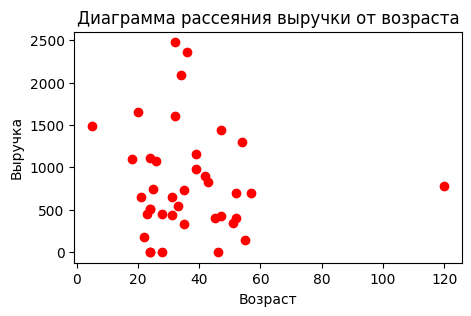

In [162]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(data['age'].to_numpy(), data['revenue'].to_numpy(), c='red')
ax.set_title('Диаграмма рассеяния выручки от возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Выручка')
plt.savefig('scatter_revenue.png')
plt.show()

По диаграмме рассеяния видно, что большинство людей имею выручку от 0 до ~1500, однако максимальной выручки до 2500 достигают люди возрастом от 35 до 40 лет.